## Prediction using Decision Tree Algorithm

 Task: Create the Decision Tree classifier and visualize it graphically.
        
A part of Data Science Internship @ The Sparks Foundation

By Tanishka Marrott

In [2]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Data Preparation

In [3]:
#Loading the iris dataset
iris = pd.read_csv('iris_dataset.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris['Species_class']=np.where(iris.Species=='Iris-virginica',1,np.where(iris.Species=='Iris-versicolor',2,3))

In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [64]:
iris['Species_class'].value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [65]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### Model Preparation and Building

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris[col], iris['Species_class'],
                                                    test_size=0.2, random_state=123)

In [80]:
parameter_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

tree = GridSearchCV(DecisionTreeClassifier(), parameter_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.2s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [84]:
tree.best_score_

0.9666666666666666

In [85]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=3)

In [86]:
tree.best_params_

{'max_depth': 4, 'max_features': 3}

In [87]:
train_pred = tree.predict(X_train)

In [88]:
test_pred = tree.predict(X_test)

In [89]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.75      1.00      0.86         6
           3       1.00      1.00      1.00        13

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



### The Final Decision Tree

In [90]:
clf_tree = DecisionTreeClassifier(max_depth=4, max_features=3)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=3)

In [91]:
tree_test_pred = pd.DataFrame( { 'Actual Value': y_test,
                            'Predicted Value': clf_tree.predict( X_test ) } )

In [92]:
tree_test_pred.sample(n=10)

,Actual Value,Predicted Value
13,3,3
20,3,3
132,1,1
36,3,3
127,1,1
138,1,2
24,3,3
112,1,1
116,1,1
42,3,3


In [93]:
metrics.accuracy_score(tree_test_pred['Actual Value'], tree_test_pred['Predicted Value'])

0.9333333333333333

C:\Users\tanis\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted Label')

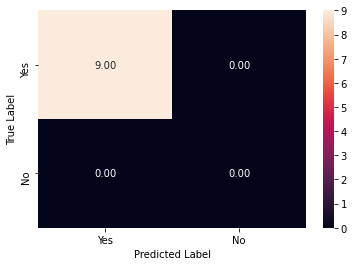

In [94]:
tree_cm = metrics.confusion_matrix(tree_test_pred['Predicted Value'],
                                 tree_test_pred['Actual Value'],
                                 [1,0])
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True Label')
plt.xlabel('Predicted Label')

### Decision Tree: A Graphical Representation

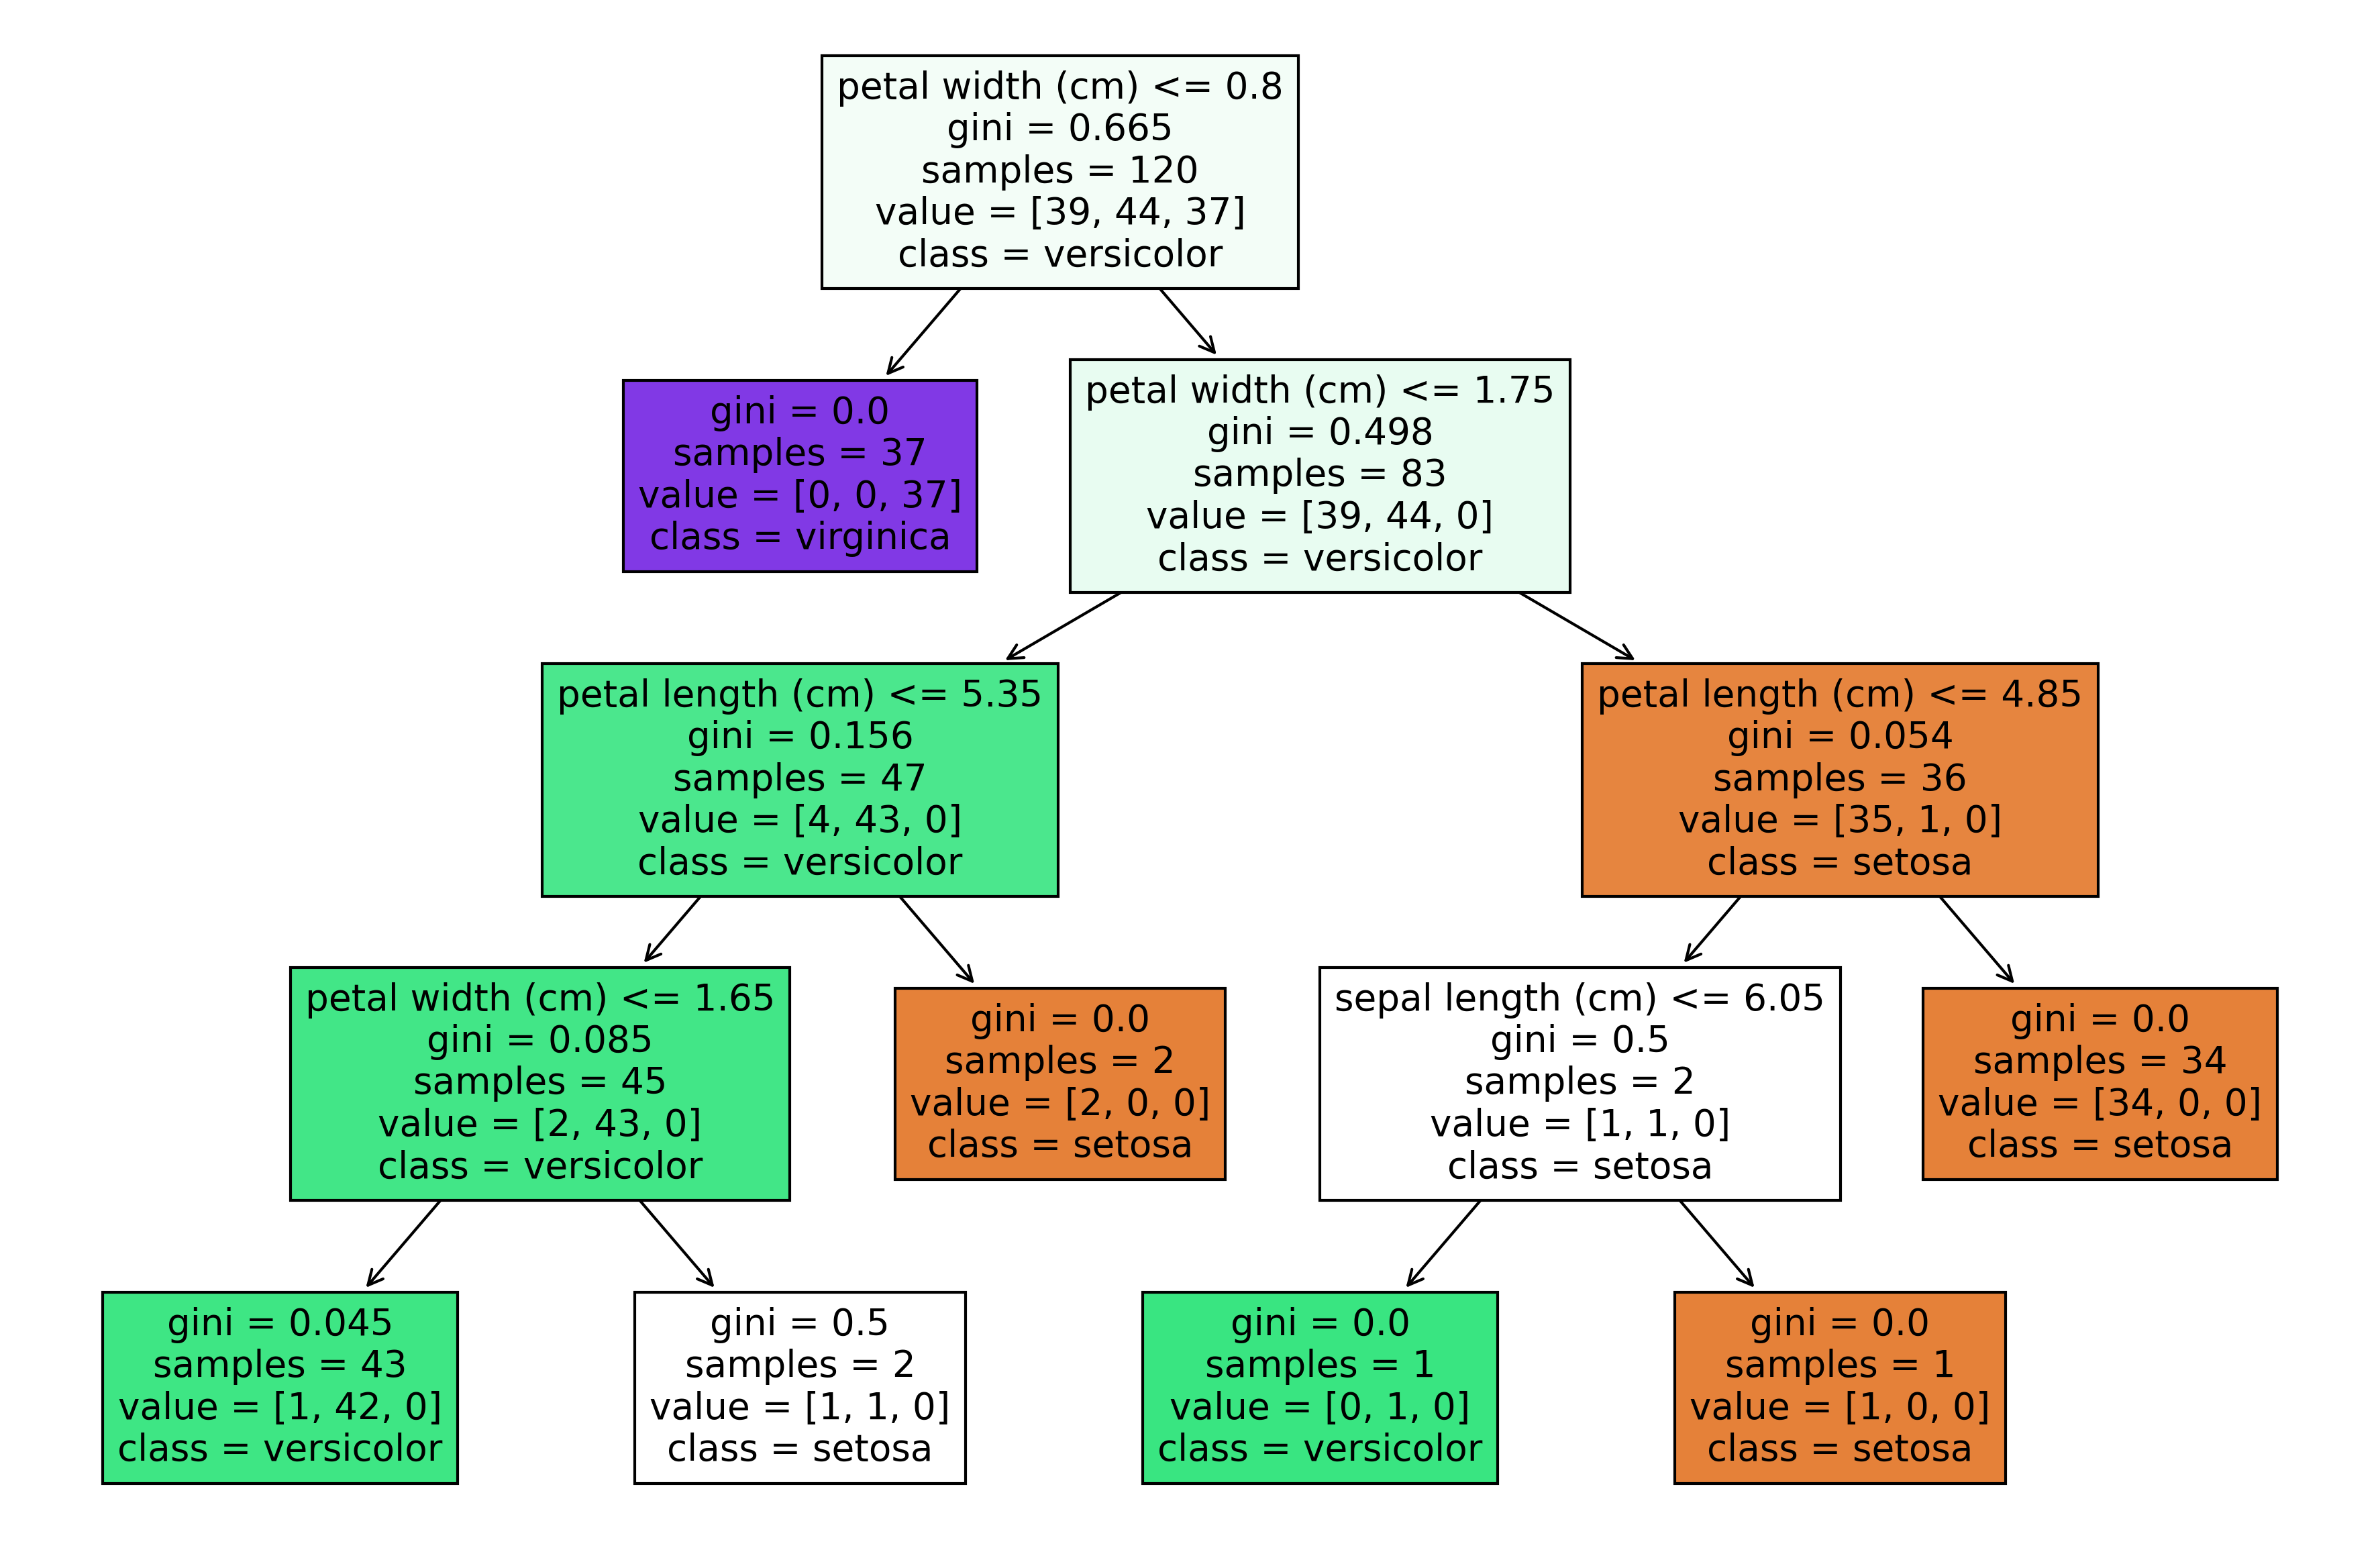

In [95]:
from sklearn import tree
feature_list= ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_list = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = feature_list, 
               class_names=class_list,
               filled = True);